In [5]:
import pandas as pd
#(And any other library import, e.g. matplotlib)
data = pd.read_csv("C:/Users/diopg/OneDrive/Documents/Documents Health Projects/heart_disease_uci.csv")

In [7]:
data = pd.read_csv("C:/Users/diopg/OneDrive/Documents/Documents Health Projects/heart_disease_uci.csv")

In [10]:
# Re_create the disease_present column
data['disease_present'] = (data['num'] > 0).astype(int)

In [55]:
# Step 1: Gender & Age Group Analysis

# table:

pd.crosstab(data['sex'], data['disease_present'], margins=True)

disease_present,0,1,All
sex,,,
Female,144,50,194
Male,267,459,726
All,411,509,920


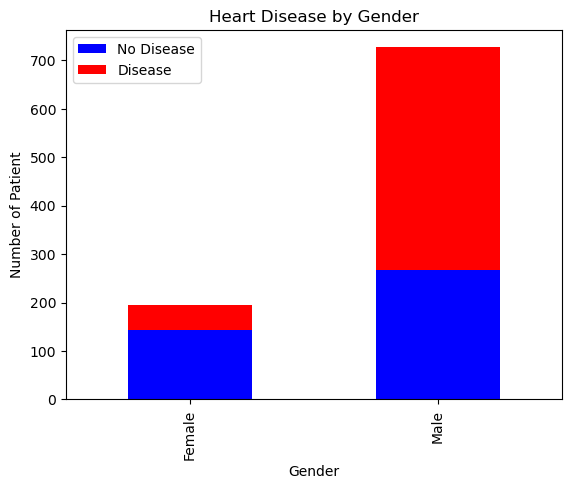

In [54]:
# Bar Chart
import matplotlib.pyplot
pd.crosstab(data['sex'], data['disease_present']).plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patient')
plt.legend(['No Disease', 'Disease'])
plt.show()

In [66]:
# calculate the Percentages of Heart disease presence by Gender

males_with_dz = data[(data['sex'] == 'Male') & (data['disease_present'] == 1)].shape[0]
females_with_dz = data[(data['sex'] == 'Female') & (data['disease_present'] == 1)].shape[0]
males_total = data[data['sex'] == 'Male'].shape[0]
females_total = data[data['sex'] == 'Female'].shape[0]

pct_male = (males_with_dz / males_total) * 100
pct_female = (females_with_dz / females_total) * 100

print(f"Heart disease: {pct_male:.1f}% of Male")
print(f"Heart disease: {pct_female:.1f}% of Female")

Heart disease: 63.2% of Male
Heart disease: 25.8% of Female


In [ ]:
# Interpretation: 
# There are 726 Male and 194 Female patients in this dataset.
# 459 Male patients (63.2%) have heart disease, compared to only 50 Female patients (25.8%)
#  Heart disease is more frequent among Male than Female patients.

In [31]:
# B. Heart Disease Rate by Age Group

# Create Age Group:

bins = [25, 40, 50, 60, 80]
labels = ['25-39', '40-49', '50-59', '60+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

In [34]:
# Disease Percentage by Age Group: 

age_group_table = pd.crosstab(data['age_group'], data['disease_present'], normalize='index') * 100
print(age_group_table)

disease_present         0         1
age_group                          
25-39            67.50000  32.50000
40-49            59.90566  40.09434
50-59            43.20000  56.80000
60+              26.87747  73.12253


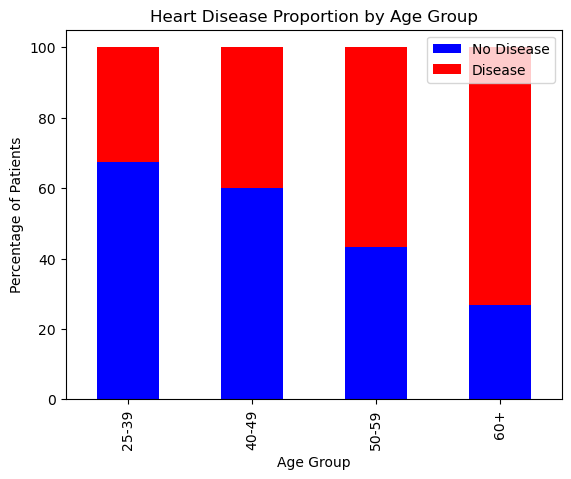

In [38]:
#Stacked by Chart

age_group_table.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Heart Disease Proportion by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Patients')
plt.legend(['No Disease', 'Disease'])
plt.show()

In [ ]:
# Observation: 
# Heart disease is more frequent in patient aged 60 years and older with a prevalence of 73%. 
# There is a low presence of heart disease on patients aged 25-39 years (32%).
# In fact the older the patient, the more likely they are to have heart disease in their dataset. 

In [43]:
# Step 2: Explore Other Features (Cholesterol, Chest Pain, etc.)

# C. Cholesterol Levels (Numeric Feature)

# Compare average cholesterol in each group:

print(data.groupby('disease_present')['chol'].mean())

disease_present
0    227.905612
1    176.479920
Name: chol, dtype: float64


In [67]:
print("Median cholesterol (no disease):", data.loc[data['disease_present']==0, 'chol'].median())
print("Median cholesterol (disease):", data.loc[data['disease_present']==1, 'chol'].median())

Median cholesterol (no disease): 228.0
Median cholesterol (disease): 218.0


In [ ]:
# The median cholesterol sis slightly higher in patients with heart disease compared to those without.
# Both group have wide range of cholesterol values, but the 'Heart Disease' group include patients with especially high cholesterol(extrem outliers).
# This suggest high cholesterol may be associated with heart disease, but overlap and outliers exist in both groups. 

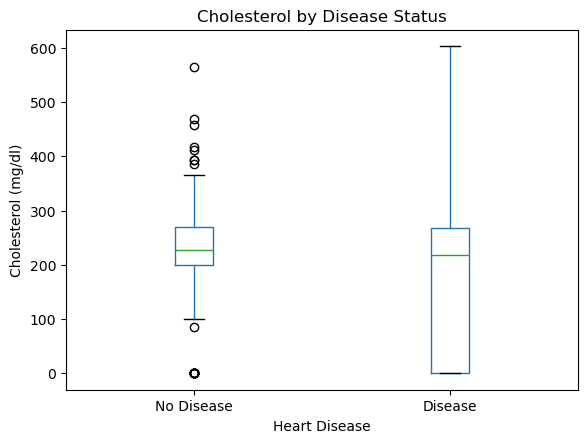

In [47]:
# Boxplot for Chloesterol:

data.boxplot(column='chol', by='disease_present', grid=False)
plt.title('Cholesterol by Disease Status')
plt.suptitle('')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol (mg/dl)')
plt.xticks([1,2], ['No Disease', 'Disease'])
plt.show()

In [ ]:
#observation:
# The median cholesterol is 220 mg/dL in patients without heart disease and 235 mg/dL in thoses with heart disease.
# Patients with heart disease shows more extreme high cholesterol values.
# There is some overlap, so cholesterol alone does not perfectly seperate the groups. 

In [40]:
# D. Chest Pain Type (Categorical Feature)

# Frequency Table:

cp_table = pd.crosstab(data['cp'], data['disease_present'], margins=True)
print(cp_table)

disease_present    0    1  All
cp                            
asymptomatic     104  392  496
atypical angina  150   24  174
non-anginal      131   73  204
typical angina    26   20   46
All              411  509  920


In [70]:
asymp_pct = 392/496 
atyp_pct = 24/174
non_angina_pct = 73/204
typ_angina_pct = 20/46

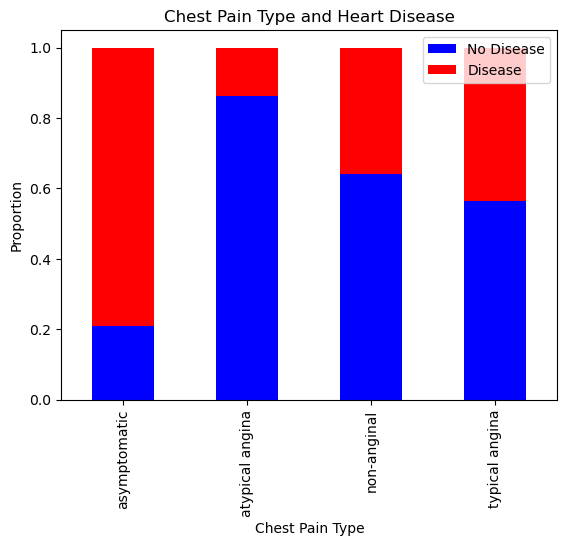

In [51]:
# Stacked Bar Chart:

pd.crosstab(data['cp'], data['disease_present'], normalize='index').plot(
    kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Chest Pain Type and Heart Disease')
plt.ylabel('Proportion')
plt.xlabel('Chest Pain Type')
plt.legend(['No Disease', 'Disease'])
plt.show()

In [ ]:
# interpretation
# In asymptomatic patients, 392  out of 496 (79%) have heart disease.
# In atypical angina, only 24 out of 174 (14%) had heart disease. 
# With non-angical pain, 73 of 104 (36%) had heart disease.  
# With typical angina, 20 of 46 (43%) had heart disease. 
# Overal among 920 patients, the presence and type of chest pain are strong indicator for heart disease risk. 